In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
df = pd.read_csv('/Users/celinepham/Downloads/amz_uk_price_prediction_dataset.csv')
display(df)

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


In [28]:
df_a = df[["uid", "category","stars","price","reviews"]]

In [29]:
df_cat = df.groupby("category")["uid"].count().sort_values(ascending = False).reset_index()

df_cat_5 = df_cat.head(5)
df_cat_5

,category,uid
0,Sports & Outdoors,836265
1,Beauty,19312
2,"Handmade Clothing, Shoes & Accessories",19229
3,Bath & Body,19092
4,Birthday Gifts,18978


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Sports & Outdoors'),
  Text(1, 0, 'Beauty'),
  Text(2, 0, 'Handmade Clothing, Shoes & Accessories'),
  Text(3, 0, 'Bath & Body'),
  Text(4, 0, 'Birthday Gifts'),
  Text(5, 0, 'Manicure & Pedicure Products'),
  Text(6, 0, 'Skin Care'),
  Text(7, 0, 'Make-up'),
  Text(8, 0, 'Hair Care'),
  Text(9, 0, 'Fragrances')])

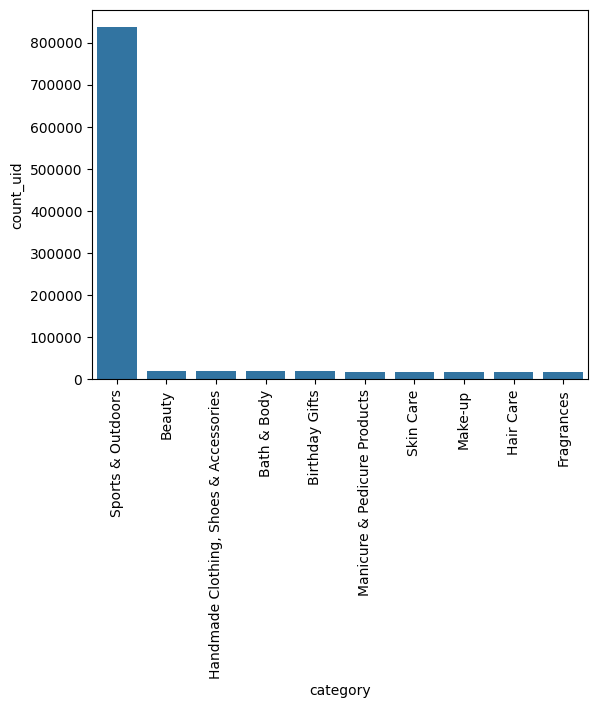

In [30]:
df_cat = df_cat.rename(columns={"uid":"count_uid"})
df_cat_10 = df_cat.head(10)

sns.barplot(df_cat_10, x="category", y="count_uid")
plt.xticks(rotation=90)

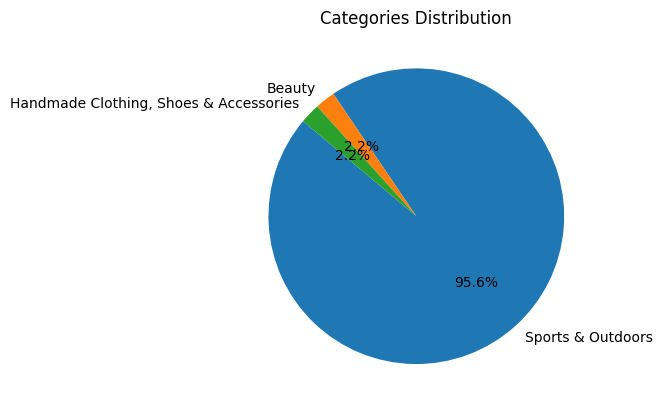

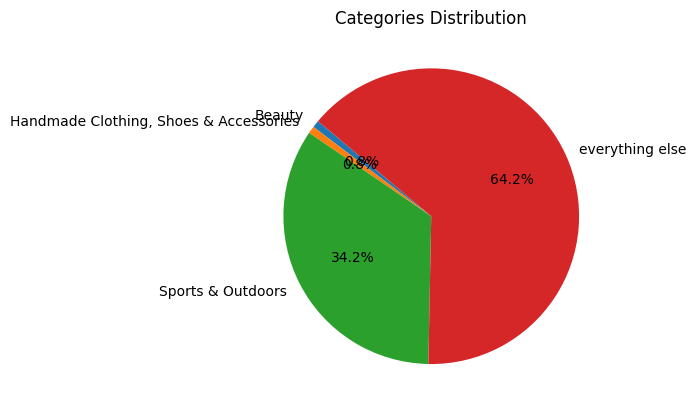

In [31]:
# plotting only top3
plt.pie(df_cat['count_uid'].head(3), labels=df_cat['category'].head(3), autopct='%1.1f%%', startangle=140)
plt.title('Categories Distribution')
plt.show()

# plotting whole dataset with top3 evidenced.

# List of categories to exclude
excluded = ['Sports & Outdoors','Beauty','Handmade Clothing, Shoes & Accessories']

# Sum count_uid where category is not in the exclude list
df_cat["cat_ck"] = df_cat.apply(lambda x: "everything else" if x["category"] not in excluded else x["category"], axis=1)

# Group by the new column and sum the count_uid
df_cat2 = df_cat.groupby("cat_ck")["count_uid"].sum().reset_index()

plt.pie(df_cat2['count_uid'], labels=df_cat2['cat_ck'], autopct='%1.1f%%', startangle=140)
plt.title('Categories Distribution')
plt.show()

The mean price for AmazonUK products is 89.24, with a median of 19.09 and mode of 0    9.99
Name: price, dtype: float64


mean            89.243809
median          19.090000
mode             9.990000
variance    119445.485323
std_dev        345.608862
range       100000.000000
iqr             36.000000
Name: price, dtype: float64



- What's the average price point of products listed? How does this compare with the most common price point (mode)?

Average price point is the mean value : 89.24 and it's much higher compared with the most common price point of 9.99.

- How varied are the product prices? Are there any indicators of a significant spread in prices?

With the products's price dispersion of 119445.49 and hence, standard deviation of 345.61 means prices are very spread.


- Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. 
    *If its hard to read these diagrams, think why this is, and explain how it could be solved.*.
 


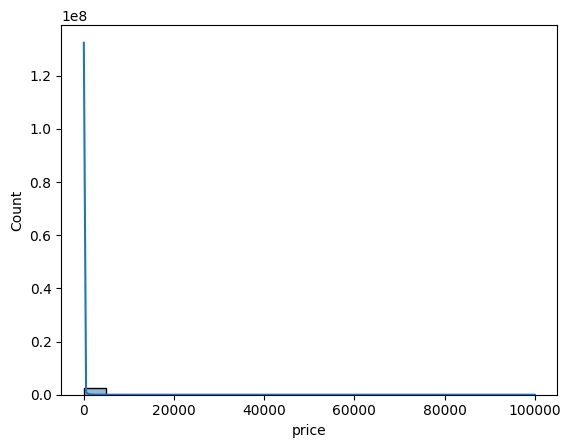


Looking at the histogram above, we can see a big spike where most of our price samples are concentrated, but a long right tail representing extreme prices that are outliers.
We can solve this by simply removing outliers from plotting using Tukey's test:    



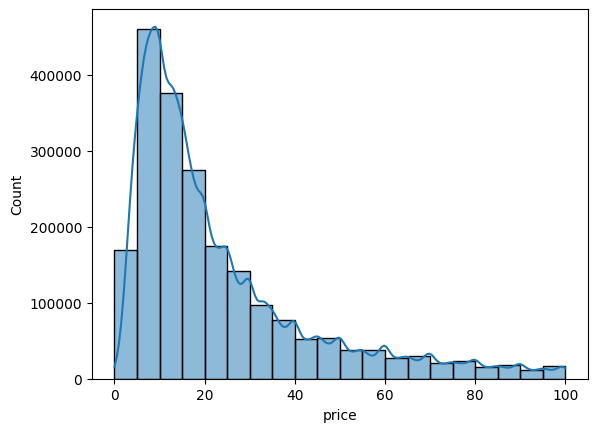


Applying Tukey's, we can see better the price dispersion by removing the extra outliers.

- Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential outliers in product pricing.




<Axes: xlabel='price'>

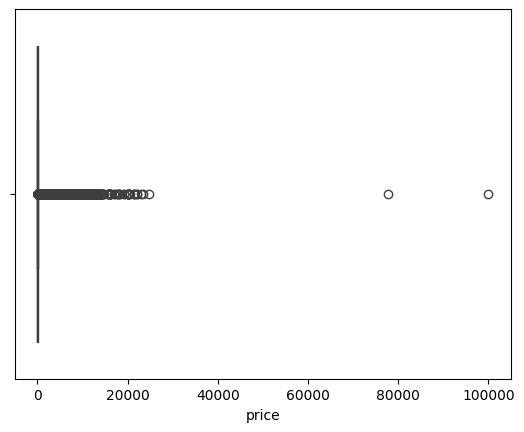

In [32]:
df_mean = df["price"].mean()
df_median = df["price"].median()
df_mode = df["price"].mode()

print(f"The mean price for AmazonUK products is {round(df_mean,2)}, with a median of {df_median} and mode of {df_mode}")

# Calculate various statistics
stats = df['price'].agg(
    mean='mean',
    median='median',
    mode=lambda x: x.mode().iloc[0],
    variance='var',
    std_dev='std',
    range=lambda x: x.max() - x.min(),
    iqr=lambda x: x.quantile(0.75) - x.quantile(0.25)
)

display(stats)

def tukeys_test_outliers(data, method="show"):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    
    # Define bounds for the outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify the outliers
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    
    if method== "show":
        return outliers
    
    elif method == "replace":
        median = data.median()
        data[outliers.index] = median
        return data
        
    elif method == "delete":
        index_drop = outliers.index
        data_no_outliers = data.drop(index_drop)
        
        return data_no_outliers
print(    f"""\n
- What's the average price point of products listed? How does this compare with the most common price point (mode)?\n
Average price point is the mean value : {round(stats["mean"],2)} and it's much higher compared with the most common price point of {stats["mode"]}.

- How varied are the product prices? Are there any indicators of a significant spread in prices?\n
With the products's price dispersion of {round(stats["variance"],2)} and hence, standard deviation of {round(stats["std_dev"],2)} means prices are very spread.\n

- Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. 
    *If its hard to read these diagrams, think why this is, and explain how it could be solved.*.\n """)
sns.histplot(df, x="price", kde=True, bins=20)    
plt.show()

print(f"""
Looking at the histogram above, we can see a big spike where most of our price samples are concentrated, but a long right tail representing extreme prices that are outliers.
We can solve this by simply removing outliers from plotting using Tukey's test:    
""")
df_removed = tukeys_test_outliers(df["price"], method = "delete")
sns.histplot(df_removed, kde=True, bins=20)
plt.show()

print(f"""
Applying Tukey's, we can see better the price dispersion by removing the extra outliers.

- Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential outliers in product pricing.\n
""")

sns.boxplot(df, x="price")

In [33]:
df[df["price"]> 70000]

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
1987238,2235317,B0CDVKNBRV,Générique L.A 350° - I5 11400F - RTX 3050 8G -...,0.0,0,77752.0,False,0,Desktop PCs
2008013,2259336,B091F5Y3CT,HB FBA Test Treadmill,0.0,0,100000.0,False,0,Sports & Outdoors


mean        2.152836
median      0.000000
mode        0.000000
variance    4.817434
std_dev     2.194865
range       5.000000
iqr         4.400000
skew        0.081207
kurt       -1.926006
Name: stars, dtype: float64

<Axes: xlabel='stars', ylabel='reviews'>

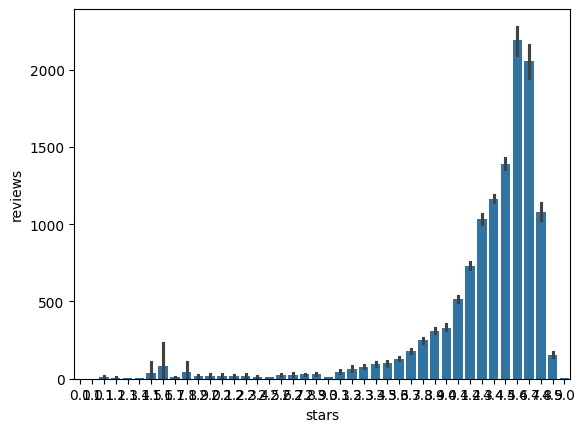

In [34]:
# Ratings in Amazon are given by a 5-star based system. 0 stars is attributed as baseline, while minimum rating of 1 is attributed to products with any review.


# Calculate various statistics
stars_stat = df['stars'].agg(
    mean='mean',
    median='median',
    mode=lambda x: x.mode().iloc[0],
    variance='var',
    std_dev='std',
    range=lambda x: x.max() - x.min(),
    iqr=lambda x: x.quantile(0.75) - x.quantile(0.25),
    skew = "skew",
    kurt = "kurt"
)

display(stars_stat)
#display( df[(df["stars"] == 5) & (df["reviews"] < 2)])

sns.barplot(df, x="stars", y="reviews")

<Axes: xlabel='stars', ylabel='Count'>

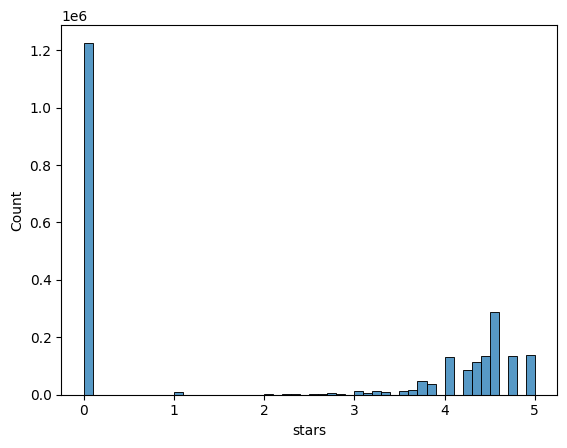

In [35]:
sns.histplot(df, x="stars", bins=50)

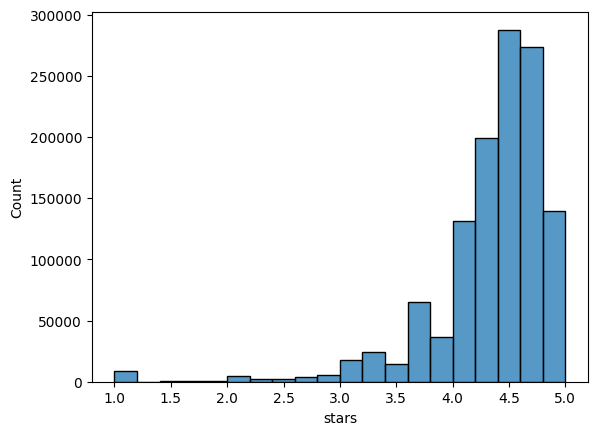

mean       4.319161
std_dev    0.555287
skew      -2.379568
kurt       9.781938
Name: stars, dtype: float64

In [36]:
df_stars = df[df["stars"]> 0]
sns.histplot(df_stars, x="stars", bins=20)
plt.show()

# Calculate various statistics
df_stars_stats = df_stars['stars'].agg(
    mean='mean',
    std_dev='std',
    skew = "skew",
    kurt = "kurt"
)

display(df_stars_stats)